<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/OutlierHandling/OutliersHandling_Capping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Capping of Outliers - Ways

1. IQR
2. Gaussian Approximation
3. Qunatiles
4. Arbitary Values

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [29]:
from sklearn.datasets import load_boston

In [30]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sel_cols = ['RM', 'LSTAT', 'CRIM']
data = data[sel_cols]

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   CRIM    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [32]:
data.isnull().sum()

RM       0
LSTAT    0
CRIM     0
dtype: int64

In [33]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [34]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Capping with IQR

- Outliers (Right) = 75th Quantile + 1.5* IQR
- Outliesr (Left) = 25th Quantile - 1.5 * IQR
- IQR = 75th Quantile - 25th Quantile

In [35]:
labels = ['RM', 'LSTAT', 'CRIM']

In [36]:
from feature_engine.outliers import Winsorizer

In [37]:
capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both',fold = 1.5, variables = labels)

In [38]:
capper_iqr.fit(data)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [39]:
capper_iqr.right_tail_caps_

{'RM': 7.730500000000001, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}

In [40]:
capper_iqr.left_tail_caps_

{'RM': 4.778499999999999, 'LSTAT': -8.057500000000005, 'CRIM': -5.31051125}

In [41]:
capper_iqr.transform(data)

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


In [42]:
data_capped = capper_iqr.transform(data)

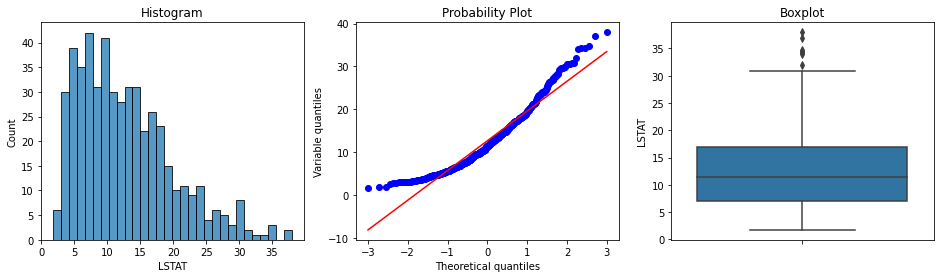

In [43]:
# before capping
diagnostic_plots(data,'LSTAT')

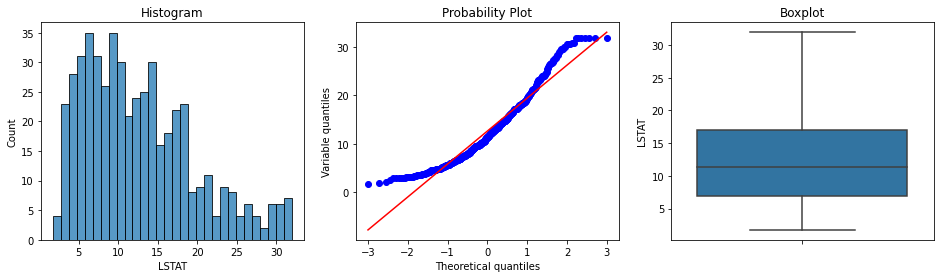

In [44]:
# after capping
diagnostic_plots(data_capped,'LSTAT')

### Capping with Gaussian Appoximation

In [45]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sel_cols = ['RM', 'LSTAT', 'CRIM']
data = data[sel_cols]

In [49]:
capper_gussian = Winsorizer(capping_method = 'gaussian', variables = labels, tail = 'both',fold = 3)

In [50]:
capper_gussian.fit(data)

Winsorizer(tail='both', variables=['RM', 'LSTAT', 'CRIM'])

In [51]:
capper_gussian.right_tail_caps_

{'RM': 8.390401930355486,
 'LSTAT': 34.05506815105818,
 'CRIM': 29.392647611199564}

In [52]:
capper_gussian.left_tail_caps_

{'RM': 4.178866844348072,
 'LSTAT': -8.748941668844733,
 'CRIM': -22.16560049657506}

In [53]:
capper_gussian.transform(data)

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


In [54]:
data_capped = capper_gussian.transform(data)

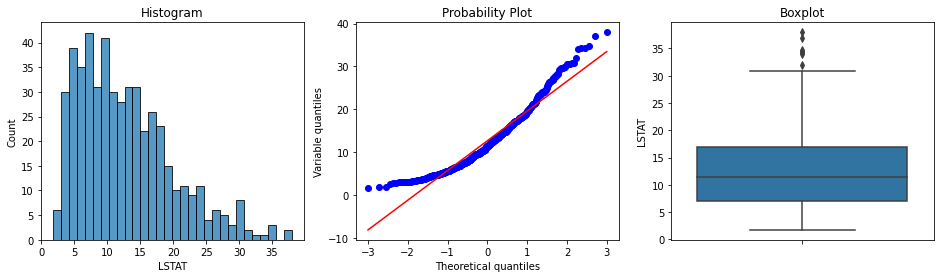

In [55]:
# before capping
diagnostic_plots(data,'LSTAT')

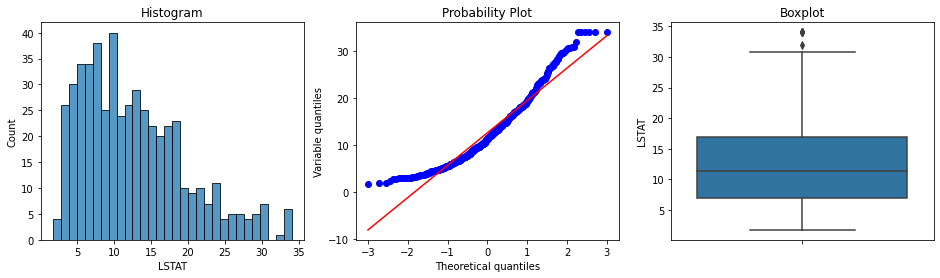

In [57]:
# after capping
diagnostic_plots(data_capped,'LSTAT')

### Capping with Qunatiles 

In [58]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sel_cols = ['RM', 'LSTAT', 'CRIM']
data = data[sel_cols]

In [60]:
capper_quantile = Winsorizer(capping_method = 'quantiles', tail = 'both', variables = labels,fold = 0.05)

In [61]:
capper_quantile.fit(data)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [62]:
capper_quantile.left_tail_caps_

{'RM': 5.314, 'LSTAT': 3.7075, 'CRIM': 0.027909999999999997}

In [63]:
capper_quantile.right_tail_caps_

{'RM': 7.5875, 'LSTAT': 26.8075, 'CRIM': 15.78915}

In [64]:
capper_quantile.transform(data)

,RM,LSTAT,CRIM
0,6.575,4.9800,0.02791
1,6.421,9.1400,0.02791
2,7.185,4.0300,0.02791
3,6.998,3.7075,0.03237
4,7.147,5.3300,0.06905
...,...,...,...
501,6.593,9.6700,0.06263
502,6.120,9.0800,0.04527
503,6.976,5.6400,0.06076
504,6.794,6.4800,0.10959


In [65]:
data_capped = capper_quantile.transform(data)

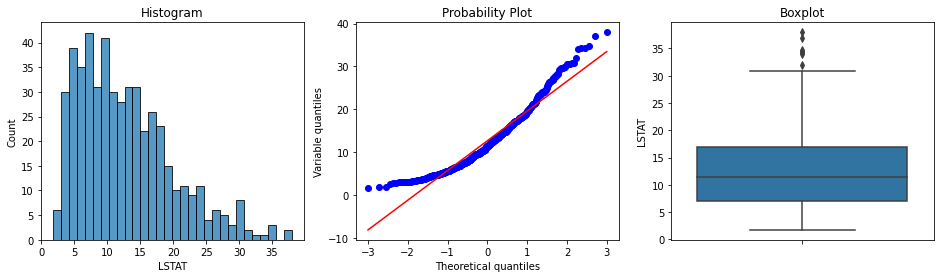

In [66]:
# before capping
diagnostic_plots(data,'LSTAT')

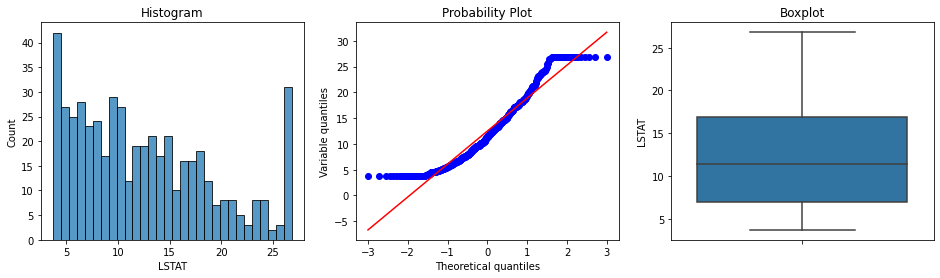

In [67]:
# after capping
diagnostic_plots(data_capped,'LSTAT')

### Capping with Arbitrary Values

In [69]:
boston = load_boston()
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sel_cols = ['RM', 'LSTAT', 'CRIM']
data = data[sel_cols]

In [83]:
# Lets choose the 99th pecentage as the arbitrary number

In [77]:
np.percentile(data['RM'],99)

8.334999999999999

In [76]:
np.percentile(data['LSTAT'],99)

33.91849999999998

In [78]:
np.percentile(data['CRIM'],99)

41.37032999999997

In [80]:
mannual_capper = [np.percentile(data[x],99) for x in labels]

In [81]:
mannual_capper

[8.334999999999999, 33.91849999999998, 41.37032999999997]

In [82]:
capper_dict = {labels[x]:mannual_capper[x] for x in range(0,len(labels))}
capper_dict

{'RM': 8.334999999999999,
 'LSTAT': 33.91849999999998,
 'CRIM': 41.37032999999997}

In [68]:
from feature_engine.outliers import ArbitraryOutlierCapper

In [85]:
capper_arbitrary = ArbitraryOutlierCapper(max_capping_dict = capper_dict,
                                          min_capping_dict = None)

In [86]:
capper_arbitrary.fit(data)

ArbitraryOutlierCapper(max_capping_dict={'CRIM': 41.37032999999997,
                                         'LSTAT': 33.91849999999998,
                                         'RM': 8.334999999999999})

In [87]:
capper_arbitrary.right_tail_caps_

{'RM': 8.334999999999999,
 'LSTAT': 33.91849999999998,
 'CRIM': 41.37032999999997}

In [88]:
capper_arbitrary.left_tail_caps_

{}

In [89]:
capper_arbitrary.transform(data)

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


In [90]:
data_capper = capper_arbitrary.transform(data)

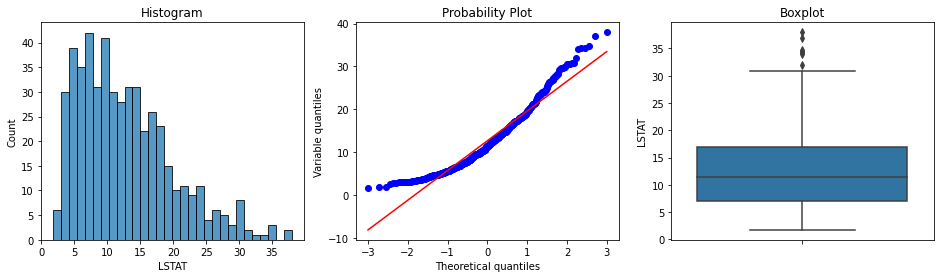

In [91]:
# before capping
diagnostic_plots(data,'LSTAT')

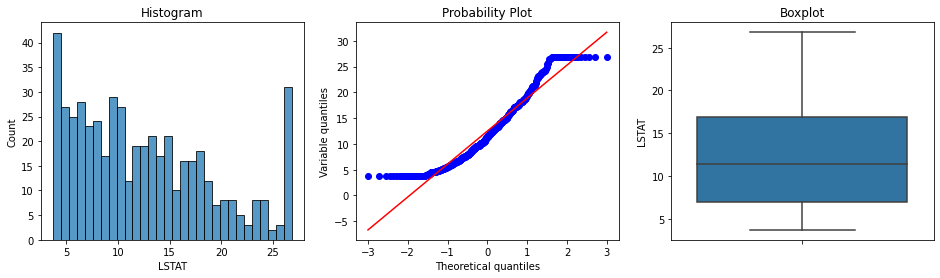

In [93]:
# After capping
diagnostic_plots(data_capped,'LSTAT')